![logo](../../picture/license_header_logo.png)
> **Copyright &copy; 2020 - 2021 CertifAI Sdn. Bhd.**<br>
 <br>
This program and the accompanying materials are made available under the
terms of the [Apache License, Version 2.0](https://www.apache.org/licenses/LICENSE-2.0). <br>
Unless required by applicable law or agreed to in writing, software
distributed under the License is distributed on an "AS IS" BASIS, WITHOUT
WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied. See the
License for the specific language governing permissions and limitations
under the License. <br>
<br>**SPDX-License-Identifier: Apache-2.0**

# 01 - Time Series Visualizations

### i) Time plot

A simple walkthrough on how to use Python to visualize time series data.

Using pandas_datareader library, we can easily import finance data for visualization exercise

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from pandas_datareader import data as web

from datetime import datetime

start = datetime(2010, 1, 1)
end = datetime(2015, 12, 31)

appl = web.get_data_yahoo('AAPL', start=start, end=end)
appl.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,7.619643,7.520000,7.611786,7.526072,352410800.0,6.439648
2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.539882
2010-01-05,7.699643,7.616071,7.664286,7.656428,601904800.0,6.551187
2010-01-06,7.686786,7.526786,7.656428,7.534643,552160000.0,6.446983
2010-01-07,7.571429,7.466072,7.562500,7.520714,477131200.0,6.435065


The current DateTimeIndex frequency is None. Sometimes, it is beneficial to use the actual frequency for analysis purpose. We can easily set the frequency using the following command.

In [3]:
# appl = appl.asfreq('D')
# appl.index

Let's plot a simple line chart of closing price against time.

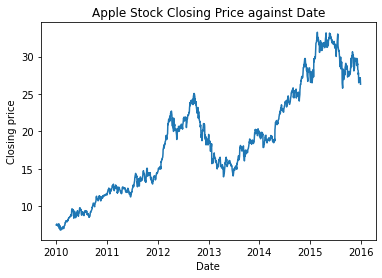

In [4]:
plt.plot(appl.Close)
plt.ylabel('Closing price')
plt.xlabel('Date')
plt.title('Apple Stock Closing Price against Date')
plt.show()

Let's plot a multivariate time series line chart consisting of two stock prices, Apple and Microsoft.

In [5]:
msft = web.get_data_yahoo("MSFT", start=start, end=end)
msft.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,30.990000,30.480000,30.980000,30.480000,31929700.0,23.739305
2010-01-04,31.100000,30.590000,30.620001,30.950001,38409100.0,24.105360
2010-01-05,31.100000,30.639999,30.850000,30.959999,49749600.0,24.113148
2010-01-06,31.080000,30.520000,30.879999,30.770000,58182400.0,23.965164
2010-01-07,30.700001,30.190001,30.629999,30.450001,50559700.0,23.715933


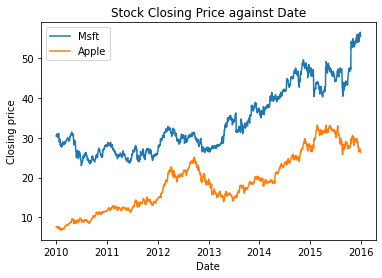

In [6]:
plt.plot(msft.Close, label="Msft")
plt.plot(appl.Close, label="Apple")
plt.ylabel('Closing price')
plt.xlabel('Date')
plt.title('Stock Closing Price against Date')
plt.legend()
plt.show()

Another way is to used plot() method on DataFrame. Below we demonstrate how to perform lag differencing and plotting it using Matplotlib.

In [7]:
import io
import requests
import pandas as pd

# let's specify the url link
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/shampoo.csv'
df = pd.read_csv(url)

# Let's print parts of the data
print(df.head())

# Actually, the data were collected starting in 2000,
# but the data do not represent it well. So let us 
# make some modifications
df.Month = ['200' + row for row in df.Month]
# df = pd.DataFrame({"Month": ["a", "b", "a"]})
    
print(df.head())
    

  Month  Sales
0  1-01  266.0
1  1-02  145.9
2  1-03  183.1
3  1-04  119.3
4  1-05  180.3
     Month  Sales
0  2001-01  266.0
1  2001-02  145.9
2  2001-03  183.1
3  2001-04  119.3
4  2001-05  180.3


Well, it is kinda difficult to work with a time series data without time indexing it. So let's try to set the time index

In [8]:
df_indexed = df.set_index("Month")
df_indexed.index = pd.to_datetime(df_indexed.index, format="%Y-%m")

df_indexed.head()

,Sales
Month,
2001-01-01,266.0
2001-02-01,145.9
2001-03-01,183.1
2001-04-01,119.3
2001-05-01,180.3


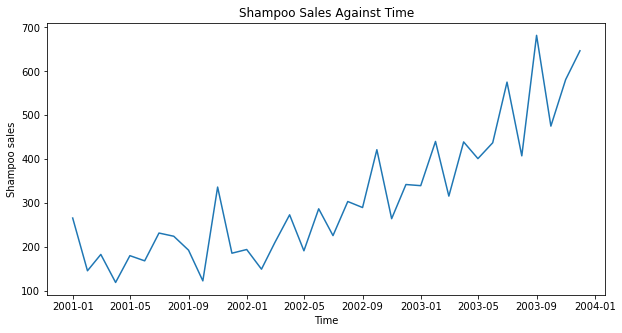

In [9]:
plt.figure(figsize=(10,5))
plt.ylabel("Shampoo sales")
plt.xlabel("Time")
plt.title("Shampoo Sales Against Time")
plt.plot(df_indexed.Sales)

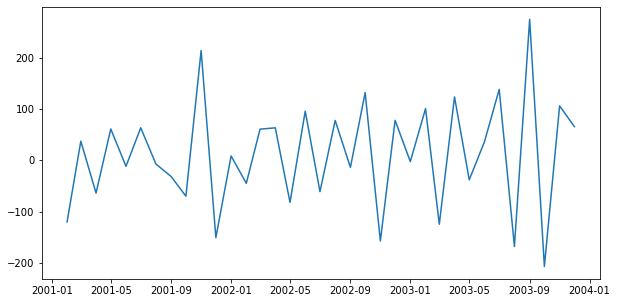

In [10]:
# let's do 1-order differencing and plot it out
df_diff1 = df_indexed.diff()
plt.figure(figsize=(10,5))
plt.plot(df_diff1)

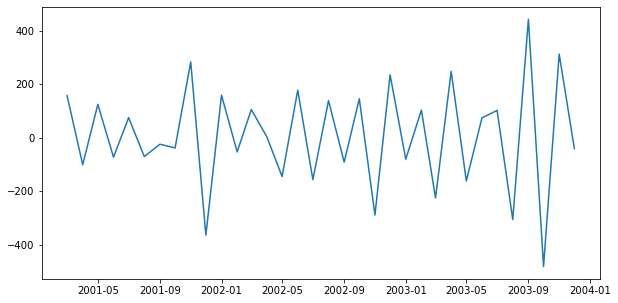

In [11]:
# let's difference it a second time
df_diff2 = df_diff1.diff()
plt.figure(figsize=(10, 5))
plt.plot(df_diff2)

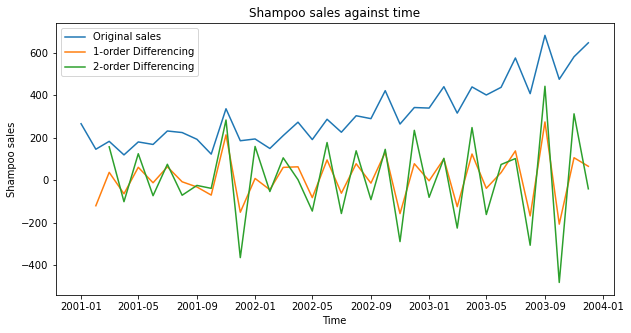

In [12]:
# let's put them all together in a same graph
plt.figure(figsize=(10, 5))
plt.ylabel("Shampoo sales")
plt.xlabel("Time")
plt.title("Shampoo sales against time")
plt.plot(df_indexed, label='Original sales')
plt.plot(df_diff1, label='1-order Differencing')
plt.plot(df_diff2, label='2-order Differencing')
plt.legend()
plt.show()

We can also plot out a simple line chart to check the trend or seasonality of it.

In [13]:
beer = pd.read_csv("../../datasets/decomposition/AusBeer.csv", parse_dates=False)
beer["Period"] = beer.Year.apply(str) +'-'+ beer.Quarter
beer.drop(labels=["Year", "Quarter", "Time"], axis=1, inplace=True)
beer['Period'] = pd.to_datetime(beer.Period)
# beer.Period = pd.PeriodIndex(beer.Period, freq="Q")
beer = beer.set_index(beer.Period)
beer = beer.rename(columns={"Beer.Production":"Production"})
beer.drop(labels="Period", axis=1, inplace=True)
beer

,Production
Period,
1956-01-01,284
1956-04-01,213
1956-07-01,227
1956-10-01,308
1957-01-01,262
...,...
2009-04-01,398
2009-07-01,419
2009-10-01,488


For illustration purpose, we will just look at the data from year 1960 to 1967.

In [14]:
beer = beer.loc["1960":"1967"]

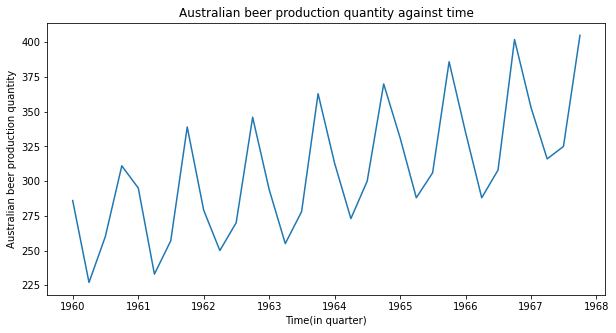

In [15]:
plt.figure(figsize=(10, 5))
plt.title("Australian beer production quantity against time")
plt.ylabel("Australian beer production quantity")
plt.xlabel("Time(in quarter)")
plt.plot(beer.index, beer.Production)

This is an example of additive decomposition.

In [16]:
passengers = pd.read_csv("../../datasets/decomposition/AirPassengers.csv", index_col=0, parse_dates=True)
# passengers = passengers.resample("Q").mean().ffill()
passengers.tail()

,#Passengers
Month,
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390
1960-12-01,432


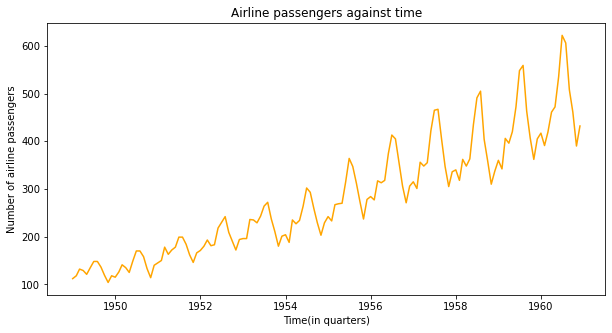

In [17]:
plt.figure(figsize=(10, 5))
plt.title("Airline passengers against time")
plt.ylabel("Number of airline passengers")
plt.xlabel("Time(in quarters)")
plt.plot(passengers, color='orange')

### ii) Lag plot

A lag plot is defined as:

***
plot of observations against its lagged self, where x-axis is the observations at time t and y-axis is the observations at time t-k
***

We can straightaway call Pandas method in order to plot a lag plot.

Some characteristics of a lag plot are:
* points cluster around diagonal line from bottom-left to top-right indicates autocorrelation

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

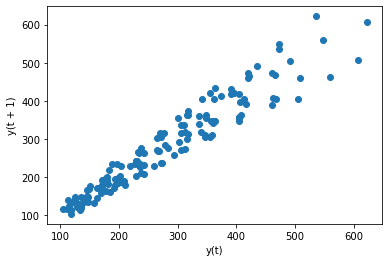

In [18]:
from pandas.plotting import lag_plot

lag_plot(passengers, lag=1)

It appears that there are autocorrelation between number of airline passengers against itself at lag-1, this makes sense as the consecutive monthly number of airline passengers should not differed much based on the time plot.

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 12)'>

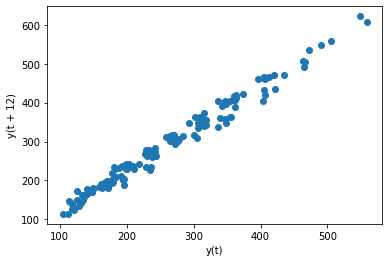

In [19]:
# let's try whether there are autocorrelation for lag-12 since it appears to have yearly seasonality
lag_plot(passengers, lag=12) 

The autocorrelation is even stronger, this makes sense as evident with the time plot, where the peak and through of a season tends to be the same month.

### iii) ACF

Next, we will plot a autocorrelation function (ACF) graph using statsmodels library. Statsmodels library is one of the go-to libraries for statistical methods.

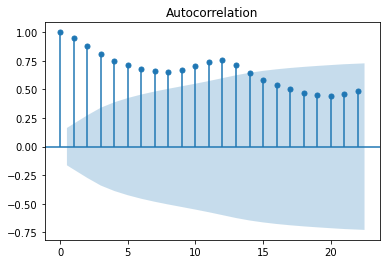

In [20]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(passengers);

This confirms that the autocorrelation strength is strongest at lag-12.

### iv) PACF

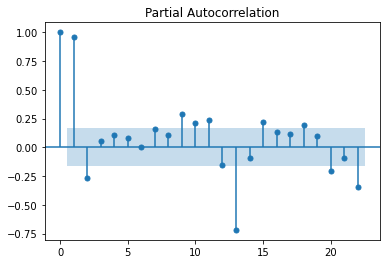

In [21]:
from statsmodels.graphics.tsaplots import plot_pacf

plot_pacf(passengers);

This is indicates that we could use AR(2) to model this time series, since there are two significant peaks other than the first peak. Nevertheless, more rigorous statistical test should be conducted to confirm this.

### v) Q-Q Plot

Q-Q plot is short for Quantile-Quantile plot. Its main usage in data analysis is to display a plot that illustrates how the data fits normal distribution.

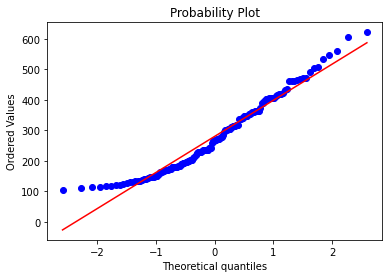

In [37]:
import scipy.stats
import pylab

scipy.stats.probplot(passengers['#Passengers'], plot=pylab)
plt.show()

Some explanations for the plot:
1. Red diagonal line indicates the location where the observations should be situated if they follow normal distribution
2. X-axis indicates how many standard deviations away that the observations lie from mean 
3. Y-axis represents the value of observations

Thus, based on the visualization, it appears that the amount of airline passengers over the years are not normally distributed. This is common for time series data.

## Part 2: Pseudodata Generation

In [22]:
from numpy.random import seed
from numpy.random import randn 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# for reproducibility
seed(123)

# generate normally distributed univariate observations, scale up 5 std and 100 mean
random_data = 5 * randn(100) + 100

# summarize
print("mean: %.3f \nstd: %.3f" % (np.mean(random_data), np.std(random_data)))


mean: 100.136 
std: 5.641


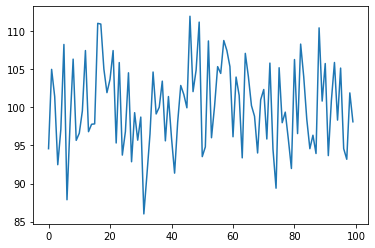

In [23]:
plt.plot(random_data, linestyle="-")

In [24]:
import pandas as pd
url = "https://raw.githubusercontent.com/fivethirtyeight/data/master/college-majors/recent-grads.csv"
df = pd.read_csv(url)
pd.set_option("display.max.columns", None) # display all columns
df.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,1849,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,556,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,558,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,1069,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,23170,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


In [25]:
df = pd.read_csv("../../datasets/decomposition/daily-total-female-births.csv", index_col="Date", parse_dates=True)
upper_outlier_boundary = df.mean()+1.5*(df.std())
lower_outlier_boundary = df.mean()-1.5*(df.std())
print(upper_outlier_boundary)
# df["upper_outlier_boundary"] = np.resize(upper_outlier_boundary, (365, 1))
df["upper_outlier_boundary"] = int(upper_outlier_boundary)
df["lower_outlier_boundary"] = int(lower_outlier_boundary)
df.head()

Births    53.003208
dtype: float64


,Births,upper_outlier_boundary,lower_outlier_boundary
Date,,,
1959-01-01,35,53,30
1959-01-02,32,53,30
1959-01-03,30,53,30
1959-01-04,31,53,30
1959-01-05,44,53,30


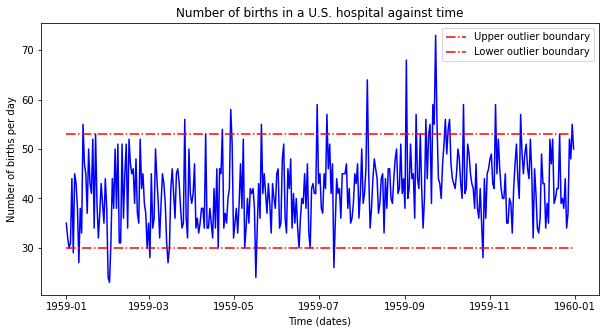

In [26]:
plt.figure(figsize=(10, 5))
plt.title("Number of births in a U.S. hospital against time")
plt.xlabel("Time (dates)")
plt.ylabel("Number of births per day")
plt.plot(df.Births, color="blue")
plt.plot(df.upper_outlier_boundary, color="red", linestyle="-.", label="Upper outlier boundary")
plt.plot(df.lower_outlier_boundary, color="red", linestyle="-.", label="Lower outlier boundary")
plt.legend()
plt.show()

In [27]:
column_names = ['Temperature', 'Relative Humidity', 'Wind Speed', 'Wind Direction']
df = pd.read_csv("../../datasets/others/weather_history_kuala_lumpur.csv", header=9, index_col=0, parse_dates=True, names=column_names)
df.head()

,Temperature,Relative Humidity,Wind Speed,Wind Direction
2020-11-27 00:00:00,26.522346,84.0,4.104631,74.74488
2020-11-27 01:00:00,25.822346,91.0,5.014219,68.96249
2020-11-27 02:00:00,25.302345,94.0,4.829907,63.43495
2020-11-27 03:00:00,24.962345,95.0,5.116561,50.71060
2020-11-27 04:00:00,24.472345,98.0,5.116561,50.71060


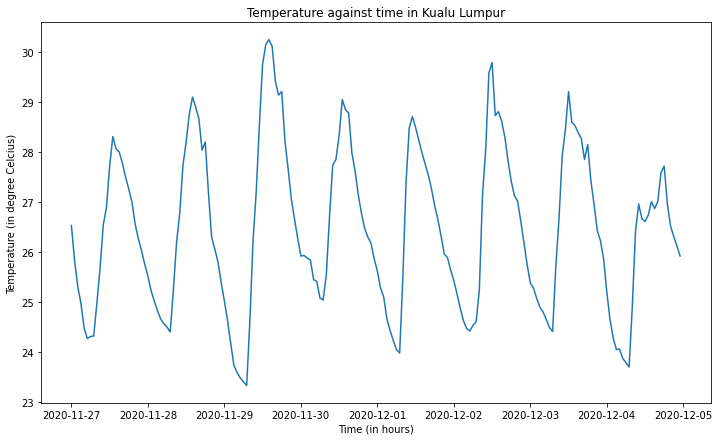

In [28]:
plt.figure(figsize=(12, 7))
plt.xlabel("Time (in hours)")
plt.ylabel("Temperature (in degree Celcius)")
plt.title("Temperature against time in Kualu Lumpur")
plt.plot(df.Temperature)
plt.show()

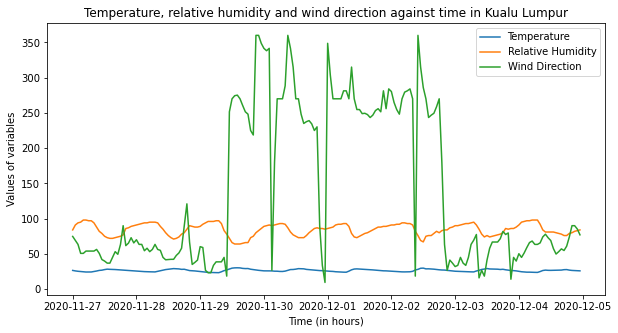

In [29]:
plt.figure(figsize=(10, 5))
plt.xlabel("Time (in hours)")
plt.ylabel("Values of variables")
plt.title("Temperature, relative humidity and wind direction against time in Kualu Lumpur")
plt.plot(df["Temperature"], label="Temperature")
plt.plot(df["Relative Humidity"], label="Relative Humidity")
plt.plot(df["Wind Direction"], label="Wind Direction")
plt.legend()
plt.show()

## Exercise

We will run through a simple exercise of time series visualizations.

Tasks that you are required to perform are list down as comment. Please insert your codes below the comment. An approximation of number of lines *n* is provided as a guideline to help you.

### i) Time plot

In [30]:
# import necessary modules (~ 4 lines of code)





# get Google stock price from 2nd Jan, 2015 until 31st December, 2016 from Yahoo (~ 1 line of code) 
# hint: ticker for Google is GOOG
goog = None

# set the frequency of DateTimeIndex to monthly (~ 1 line of code) 


# confirm the index and its frequency (~ 1 line of code) 
date_time_index = None
print(f"\n\nDateTimeIndex is :\n{date_time_index}")

# remove NAN values that resulted due to the non-trading day (~ 1 line of code) 



# plot a simple line chart of high price against time (~ 1 line of code) 


# provide x-axis label as 'Date' (~ 1 line of code) 


# provide y-axis label as 'High price' (~ 1 line of code) 


# provide figure title as 'Google Stock High Price against Date' (~ 1 line of code) 


# display the plot




DateTimeIndex is :
None


In [31]:
# You can display your object here
goog

### ii) Lag plot

In [32]:
# import library  (~ 1 line of code) 


# plot a lag plot for lag of 1 using Google stock price data that we acquired earlier (~ 1 line of code) 



Q: Are there any autocorrelation based on the lag plot? \
A: Not evident.

### iii) ACF

In [33]:
# import library  (~ 1 line of code) 


# plot ACF correlogram using Google High price and Statsmodels 
# package (~ 1 line of code) 



**Q:** Is the high price of daily Google stock have high autocorrelation? \
**A:**

### iv) PACF

In [34]:
# import library  (~ 1 line of code) 


# plot PACF correlogram of low price of Google stock data



**Q:** Do you think that we have any signal that we can gain from this PACF correlogram? \
**A:** 

### v) Q-Q Plot

In [1]:
# import library (~ 2 lines of code)


# plot Q-Q plot of Google stock daily closing price (~1 line of code)


## References
1. https://towardsdatascience.com/4-pandas-plotting-function-you-should-know-5a788d848963
2. https://www.meteoblue.com/en/weather/archive/export/kuala-lumpur_malaysia_1735161